In [1]:
# Class name: AI1811
# Student code: HE181685
# Student name: Nguyễn Thành Trung
# Subject: CPV301-LAB8

In [2]:
import cv2
import numpy as np
import os
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [3]:
def load_images_from_folder(folder, image_size=(100, 100)):
    images = []
    original_images = []
    labels = []
    
    # Sắp xếp danh sách file để đảm bảo đúng thứ tự ảnh và nhãn
    filenames = sorted(os.listdir(folder))
    
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, image_size)  # Resize ảnh màu
            images.append(img_resized.flatten())
            original_images.append(img_resized)
            labels.append(filename.split('.')[0])  # Lấy tên file làm nhãn
    
    return np.array(images), original_images, labels

def mean_face(images):
    return np.mean(images, axis=0)

def eigenfaces(images, num_components=10):
    mean_img = mean_face(images)
    centered_images = images - mean_img

    U, S, Vt = np.linalg.svd(centered_images, full_matrices=False)
    eigenvectors = Vt[:num_components]
    
    eigenfaces = normalize(eigenvectors, axis=1)
    return mean_img, eigenfaces

def project_face(face, mean_img, eigenfaces):
    return np.dot(face - mean_img, eigenfaces.T)

def recognize(input_image, mean_img, eigenfaces, projections, labels):
    projected_input = project_face(input_image, mean_img, eigenfaces)
    distances = np.linalg.norm(projections - projected_input, axis=1)
    min_index = np.argmin(distances)
    return labels[min_index], distances[min_index], min_index


In [4]:
# Train model
folder = "C:/Users/pagmas.saint/Music/Desktop/FPT University/CPV/Train-data"
images, original_images, labels = load_images_from_folder(folder, image_size=(100, 100))
mean_img, eigenfaces = eigenfaces(images)
projections = np.array([project_face(img, mean_img, eigenfaces) for img in images])


In [5]:
#Input ảnhảnh
input_image_path = 'C:/Users/pagmas.saint/Pictures/Camera Roll/WIN_20241104_22_44_49_Pro.jpg'
input_image = cv2.imread(input_image_path) 
input_image_resized = cv2.resize(input_image, (100, 100)).flatten()
label, distance, min_index = recognize(input_image_resized, mean_img, eigenfaces, projections, labels)

Recognized label: 9 with distance: 5586.403053710197


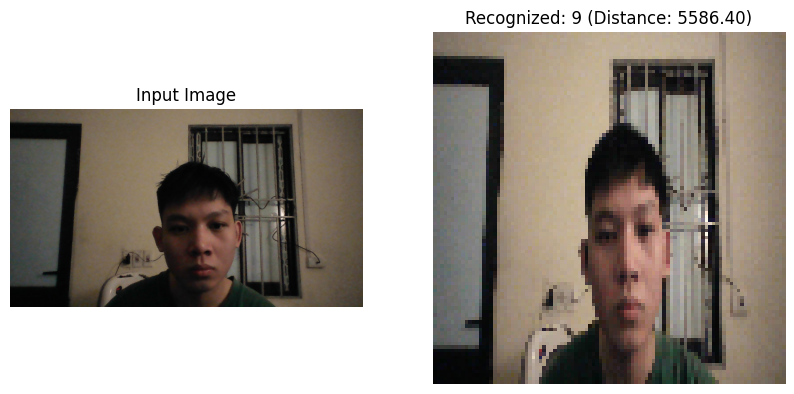

In [6]:
# In ra kết quả
print("Recognized label:", label, "with distance:", distance)

# Hiển thị ảnh đầu vào và ảnh nhận dạng gần nhất
plt.figure(figsize=(10, 5))

# Hiển thị ảnh đầu vào
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Hiển thị ảnh nhận dạng gần nhất
plt.subplot(1, 2, 2)
plt.title(f"Recognized: {label} (Distance: {distance:.2f})")
plt.imshow(cv2.cvtColor(original_images[min_index], cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()